# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

The objective is to segment countries into clusters based on various socioeconomic indicators, including child mortality, exports, health spending, imports, income, inflation, life expectancy, fertility, and GDP per capita

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
names = df[['country']].copy()

In [5]:
X = df.drop('country', axis=1)

scaler = StandardScaler().fit(X)

In [6]:
X_scaled = scaler.transform(X)

# 1.) kmeans Model with 5 Clusters

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

# 2.) Picking two features to visualize

In [8]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

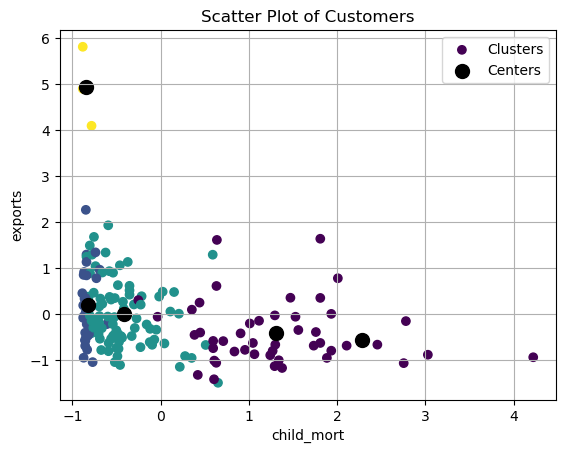

In [9]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [10]:
WCSSs=[]
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [11]:
WCSSs

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086873,
 700.3917199643636,
 628.5382539105315,
 550.7126024726136,
 496.70432493968644,
 458.96447264173463,
 424.1467153350682,
 393.0096759632763,
 369.4186075000165,
 352.7704911881026,
 333.2104613610854,
 322.9118255040936]

# 4.) Use the above work and economic critical thinking to choose a number of clusters.

Text(0.5, 0, '# of Clusters')

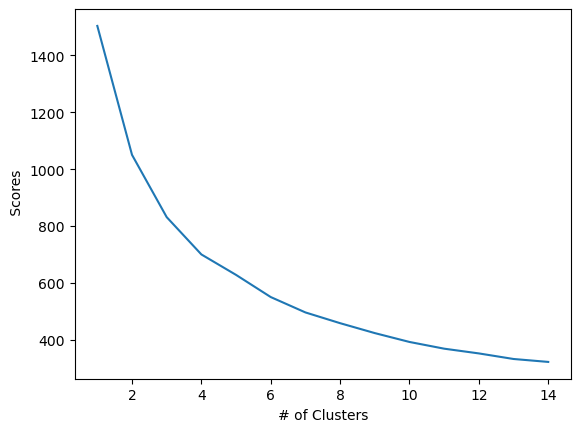

In [12]:
plt.plot(ks, WCSSs)
plt.ylabel(' Scores')
plt.xlabel('# of Clusters')

# 6.) Do the same for a silhoutte plot

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
SCs=[]
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    labs = kmeans.labels_
    SCs.append(silhouette_score(X_scaled, labs))


C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 0, '# of Clusters')

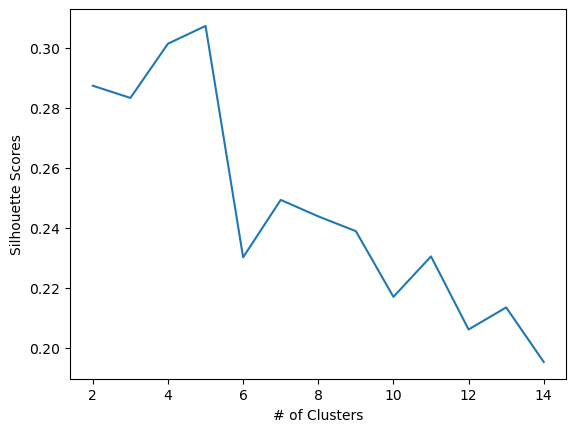

In [15]:
plt.plot(ks, SCs)
plt.ylabel('Silhouette Scores')
plt.xlabel('# of Clusters')

Elbow Plot (WCSS vs. Number of Clusters): The Within-Cluster Sum of Square (WCSS) plot, often referred to as the elbow plot, shows a sharp decline in WCSS as the number of clusters increases from 1 to 5. After the number of clusters exceeds 5, the decline becomes more gradual, indicating that adding more clusters does not significantly improve the within-cluster homogeneity. 

Silhouette Score Plot (Silhouette Score vs. Number of Clusters): The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette plot shows that the silhouette score is highest when there are five clusters and decreases as the number of clusters increases. 

Despite these analyses suggesting that a larger number of clusters might be more appropriate (4 or 5 based on the elbow method), the decision to choose 2 clusters is a conceptual choice to distinguish between "developed" and "developing" countries. This decision prioritizes interpretability and the application of a specific economic theory over the data-driven indications from the WCSS and silhouette plots.


# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [16]:
kmeans = KMeans(n_clusters = 2, n_init=30, init='random').fit(X_scaled)

# n_clusters = 2 because we want to look at dveeloping v developed ocutnries (despite the plots telling us to choose clusters as 4/5)

C:\Users\anshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [18]:
output = pd.concat([preds, df], axis=1)

In [19]:
output.head()

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
print("Cluster 1: ", )
print(list(output[output[0] == 0]["country"]))

Cluster 1: 
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea

In [21]:
print("Cluster 2: ", )
print(list(output[output[0] == 1]["country"]))

Cluster 2: 
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']


Cluster 1 contains countries that are generally more developed, with established economies. These include nations from various regions, such as Europe (e.g., Germany, France, United Kingdom), North America (e.g., Canada, United States), Asia (e.g., Japan, South Korea), and the Middle East (e.g., Israel, United Arab Emirates). These countries typically have higher incomes, better healthcare systems, and longer life expectancies.

Cluster 2 is comprised of countries that tend to be less developed with lower income levels, higher child mortality rates, and shorter life expectancies. This cluster includes many countries from regions like Sub-Saharan Africa (e.g., Angola, Chad), South Asia (e.g., Afghanistan, Bangladesh), and some from the Pacific Islands (e.g., Vanuatu, Solomon Islands). These countries may be more susceptible to economic shocks and health crises and often require more international aid and development programs.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [22]:
output1 = output.drop('country', axis=1)
output1.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [23]:
output1.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

Descriptive statistics for the two clusters reveal significant disparities between them:

Child Mortality (child_mort): The mean child mortality in Cluster 1 is significantly lower than in Cluster 2. This indicates better healthcare and child survival in the countries of Cluster 1.

Income (income): There is a stark contrast in mean income between the clusters, with Cluster 1 having significantly higher incomes. This aligns with the observation that Cluster 1 countries are more developed.

Life Expectancy (life_expec): Life expectancy is higher in Cluster 1, suggesting better overall health conditions and healthcare systems.

Fertility (total_fer): Cluster 1 has a lower fertility rate, which often correlates with higher levels of education and women's participation in the workforce.

GDP per capita (gdpp): The GDP per capita is much higher for countries in Cluster 1, underscoring their economic development.

From the standard deviations (std), it's apparent that there is considerable variability within each cluster, especially regarding income and GDP per capita in Cluster 1. This suggests that while countries within each cluster share general characteristics, there is still diversity in economic performance and health indicators among them.

In conclusion, the two clusters represent a divide between the developed and developing world, with Cluster 1 including countries with stronger economies and better health indicators, while Cluster 2 includes countries that are likely struggling with poverty, health issues, and economic development. 